In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from keras import backend as keras_backend #for to convert in float32
from keras.utils import to_categorical

from imutils import paths
import numpy as np
import argparse
import cv2
import os
import keras
#for to read and show images, better than opencv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# for tensorboard
from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
#parameters
Num_epochs = 5
image_height = 128
image_width =128
random_seed = 36
Test_Size = 0.5

number_of_pixels = image_height * image_width
def image_to_feature_vector(image, size=(image_height, image_width)):
    # resize the image to a fixed size, then flatten the image into a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

[INFO] describing images... 128 128
[INFO] processed 1000/17509
[INFO] processed 2000/17509
[INFO] processed 3000/17509
[INFO] processed 4000/17509
[INFO] processed 5000/17509
[INFO] processed 6000/17509
[INFO] processed 7000/17509
[INFO] processed 8000/17509
[INFO] processed 9000/17509
[INFO] processed 10000/17509
[INFO] processed 11000/17509
[INFO] processed 12000/17509
[INFO] processed 13000/17509
[INFO] processed 14000/17509
[INFO] processed 15000/17509
[INFO] processed 16000/17509
[INFO] processed 17000/17509


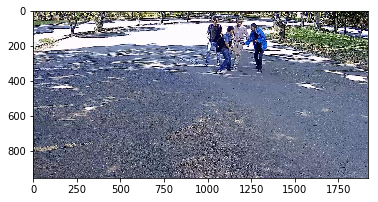

In [3]:
print("[INFO] describing images...", image_height, image_width)
#imagePaths = list(paths.list_images("/home/javeriana/Dropbox/Javeriana/Courses/RotaciónII-Tamura/Original/All"))
#imagePaths = list(paths.list_images("/home/roger/Dropbox/Javeriana/Courses/RotaciónII-Tamura/Original/All"))
imagePaths = list(paths.list_images("E:\Dropbox\Javeriana\Courses\RotaciónII-Tamura\Original\All"))
data = []
labels = []
for (i, imagePath) in enumerate(imagePaths):
    imagePath=imagePaths[i]
    image = mpimg.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    features = image_to_feature_vector(image)
    data.append(features)
    labels.append(label)
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))
        imgplot = plt.imshow(image)
le = LabelEncoder()     # Encode labels with value between 0 and n_classes-1.
labels = le.fit_transform(labels)

In [4]:
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=Test_Size, random_state=random_seed)

X_train=np.array(X_train)   #converting to array numpy for obtain shape
X_test = np.array(X_test)
X_train = keras_backend.cast_to_floatx(X_train) #convert to float 32
X_test = keras_backend.cast_to_floatx(X_test)
X_train /= 255.0
X_test /= 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('samples_train shape = ', X_train.shape)
print('samples_test shape = ', X_test.shape)
print('labels_train shape = ', y_train.shape)
print('labels_test shape = ', y_test.shape)

samples_train shape =  (8754, 49152)
samples_test shape =  (8755, 49152)
labels_train shape =  (8754, 2)
labels_test shape =  (8755, 2)


In [5]:
# define the architecture of the network
model = Sequential()
model.add(Dense(768, activation="relu", kernel_initializer="uniform"))
model.add(Dense(384, activation="relu", kernel_initializer="uniform"))
model.add(Dense(2))
model.add(Activation("softmax"))
# train the model using SGD
print("[INFO] compiling model...")
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

[INFO] compiling model...


In [6]:
print('Test Size = ', Test_Size)
history= model.fit(X_train, y_train, epochs=Num_epochs, batch_size=128,	verbose=1)
# show the accuracy on the testing set
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))
model.summary()
history.history['acc']

Test Size =  0.5
Epoch 1/5
8754/8754 [==============================] - 18s 2ms/step - loss: 0.3849 - acc: 0.9074
Epoch 2/5
8754/8754 [==============================] - 11s 1ms/step - loss: 0.0679 - acc: 0.9869
Epoch 3/5
8754/8754 [==============================] - 11s 1ms/step - loss: 0.0445 - acc: 0.9921
Epoch 4/5
8754/8754 [==============================] - 11s 1ms/step - loss: 0.0194 - acc: 0.9998
Epoch 5/5
8754/8754 [==============================] - 11s 1ms/step - loss: 0.0124 - acc: 1.0000
[INFO] evaluating on testing set...
8755/8755 [==============================] - 4s 445us/step
[INFO] loss=0.0121, accuracy: 100.0000%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 768)               37749504  
_________________________________________________________________
dense_2 (Dense)              (None, 384)               295296    
_________________________________

[0.9073566370749,
 0.9868631482750743,
 0.9921178889650446,
 0.9997715330134795,
 1.0]